# Objective

To identify online payment fraud with data analysis, we need to train for classifying fraudulent and non-fraudulent payments. For this, we need a dataset containing information about online payment fraud to understand what type of transactions lead to fraud. For this task, I collected a dataset from Kaggle, which includes historical information about fraudulent transactions that can be used to detect fraud in online payments.

# Business Reason

We are living in the digital world where people started approaching towards current technologies. They make our work easy and its reliable.

Online payment is one of the scenarios where people started using in recent years. Just one click! one Tap! makes our work easier and faster. As much as we know about the merits of online payment, there are fraudsters who try to loot money from people with different techniques.

With the increase of online payment now-a-days, the online payment fraud has also been rising and it's actually a major concern among the people who are not aware of the current technologies.

Let's analyze about the online payment fraud detection dataset taken from Kaggle and provide insights on this!!

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:\Others project sample\onlinefraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data Understanding

In [3]:
df.shape

(6362620, 11)

In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

These columns provide below information

**step**: represents a unit of time where 1 step equals 1 hour

**type**: type of online transaction

**amount**: the amount of the transaction

**nameOrig**: customer starting the transaction

**oldbalanceOrg**: balance before the transaction

**newbalanceOrig**: balance after the transaction

**nameDest**: recipient of the transaction

**oldbalanceDest**: initial balance of recipient before the transaction

**newbalanceDest**: the new balance of recipient after the transaction

**isFraud**: fraud transaction

In [5]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Its a good thing that there is no missing values!

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Exploratory Data Analysis

## Univariate Analysis

### Analyzing Feature: type

In [15]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

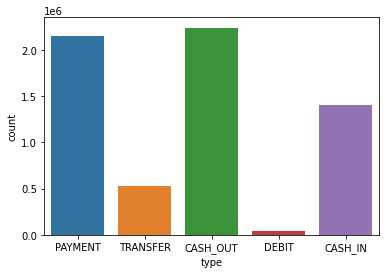

In [16]:
sns.countplot(x='type', data=df)

* It looks like that cash out takes the most of the data and then payment so we can conclude that the most of fraud will be in this two types

### Analyzing Feature: amount 

In [8]:
print('Minimum: ',df.amount.min())
print('Maximum: ',df.amount.max())

Minimum:  0.0
Maximum:  92445516.64


In [4]:
df["amount"].mean()

179861.90354912292

* Lowest amount transaction starts from 0, highest amount transaction goes upto 9 crore and the average amount is upto 1 lakhs

Text(0.5, 1.0, 'Analysis of the amount of the transaction')

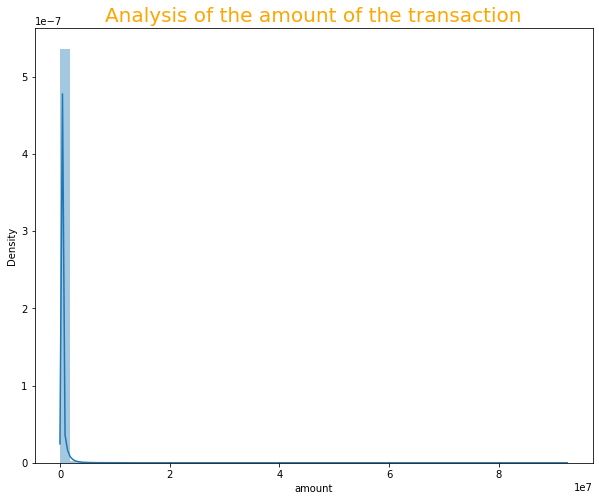

In [5]:
plt.figure(figsize=(10,8))
sns.distplot(df.amount)
plt.title(f"Analysis of the amount of the transaction" , fontsize=20,
          color="orange")

* The distribution of transaction amounts is right skewed. This indicates that most values are clustered around the left side of the distribution, with the longer right tail.

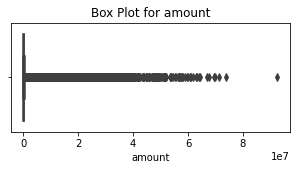

In [3]:
plt.figure(figsize=(5,2))
sns.boxplot(df['amount'])

plt.xlabel('amount')
plt.title('Box Plot for amount')
plt.show()

### Analyzing Feature: nameOrig

In [6]:
df['nameOrig'].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

### Analyzing Feature: nameDest

In [7]:
df['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

* There are 2722362 recipients, and every step has at least 1 occurrence.

### Analyzing Feature: oldbalanceOrg 

Text(0.5, 1.0, 'Distribution of transaction amount')

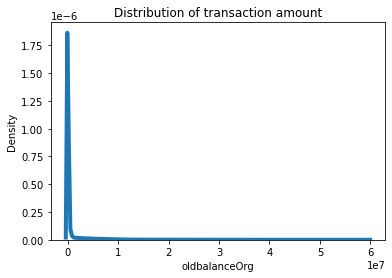

In [3]:
sns.kdeplot(df['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

* The distribution of pre-transaction balances of the initial customers is right skewed.

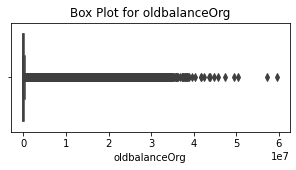

In [5]:
plt.figure(figsize=(5,2))
sns.boxplot(df['oldbalanceOrg'])

plt.xlabel('oldbalanceOrg')
plt.title('Box Plot for oldbalanceOrg')
plt.show()

### Analyzing Feature: newbalanceOrig

Text(0.5, 1.0, 'Distribution of transaction amount')

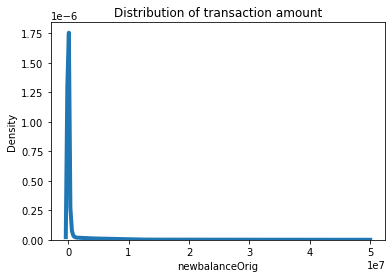

In [4]:
sns.kdeplot(df['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

* The distribution of post-transaction balances of the initial customers is right skewed.

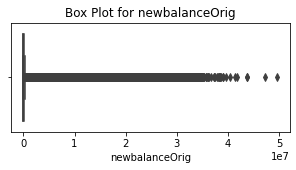

In [6]:
plt.figure(figsize=(5,2))
sns.boxplot(df['newbalanceOrig'])

plt.xlabel('newbalanceOrig')
plt.title('Box Plot for newbalanceOrig')
plt.show()

### Analyzing Feature: oldbalanceDest

Text(0.5, 1.0, 'Distribution of transaction amount')

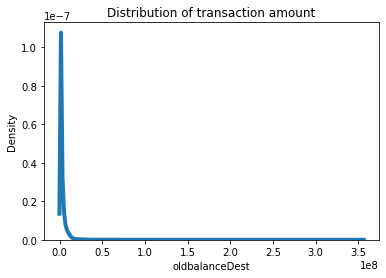

In [5]:
sns.kdeplot(df['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

* The distribution of pre-transaction balances of the recipient is right skewed.

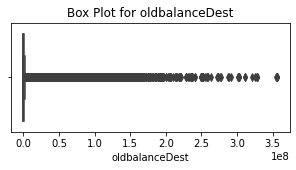

In [7]:
plt.figure(figsize=(5,2))
sns.boxplot(df['oldbalanceDest'])

plt.xlabel('oldbalanceDest')
plt.title('Box Plot for oldbalanceDest')
plt.show()

### Analyzing Feature: newbalanceDest

Text(0.5, 1.0, 'Distribution of transaction amount')

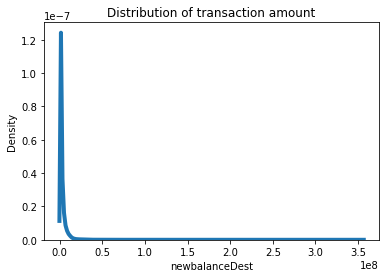

In [6]:
sns.kdeplot(df['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

* The distribution of post-transaction balances of the recipient is right skewed.

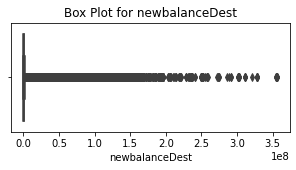

In [10]:
plt.figure(figsize=(5,2))
sns.boxplot(df['newbalanceDest'])

plt.xlabel('newbalanceDest')
plt.title('Box Plot for newbalanceDest')
plt.show()

### Analyzing Feature: isFraud

In [3]:
Fraud = df[df.isFraud == 1]
non_Fraud = df[df.isFraud == 0]

In [4]:
len(Fraud)

8213

In [5]:
len(non_Fraud)

6354407

In [12]:
total_transaction = df.shape[0]

fraud_transaction = df[df.isFraud == 1].shape[0]

fraud_percent = fraud_transaction/total_transaction * 100
fraud_percent

0.12908204481801522

* We can see overall fraud transaction is 0.13%. There are much more non-fraudulent transactions than fraudulent transactions.

Text(0.5, 1.0, 'Analysis of Fraud')

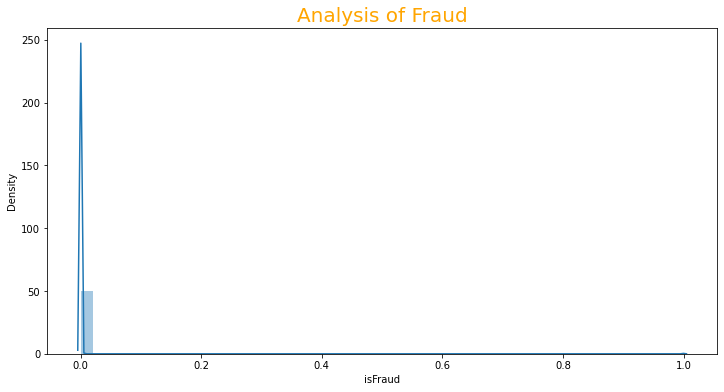

In [20]:
plt.figure(figsize=(12,6))
sns.distplot(df.isFraud)
plt.title(f"Analysis of Fraud" , fontsize=20,
          color="orange")

## Outlier Handling 

<AxesSubplot:>

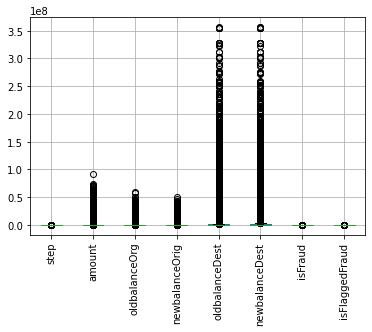

In [4]:
#checking outliers using boxplot
df.boxplot(rot=90)

In [3]:
def outlier_treatment(dcol):
    sorted(dcol)
    Q1,Q3 = np.percentile(dcol , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

#### Using the above function, lets get the lowerbound and upperbound values 

### Treating outliers for column - amount

In [4]:
lower_limit, upper_limit = outlier_treatment(df.amount)
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

Upper limit:  501719.33875
Lower limit:  -279608.29125


In [5]:
df['amount'] = np.where(
    df['amount'] > upper_limit,
    upper_limit,
    np.where(
        df['amount'] < lower_limit,
        lower_limit,
        df['amount']
    )
)

<AxesSubplot:xlabel='amount'>

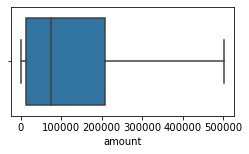

In [6]:
plt.figure(figsize=(4, 2))
sns.boxplot(df['amount'])

### Treating outliers for column - oldbalanceOrg

In [7]:
lower_limit, upper_limit = outlier_treatment(df.oldbalanceOrg)
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

Upper limit:  268287.9375
Lower limit:  -160972.7625


In [8]:
df['oldbalanceOrg'] = np.where(
    df['oldbalanceOrg'] > upper_limit,
    upper_limit,
    np.where(
        df['oldbalanceOrg'] < lower_limit,
        lower_limit,
        df['oldbalanceOrg']
    )
)

<AxesSubplot:xlabel='oldbalanceOrg'>

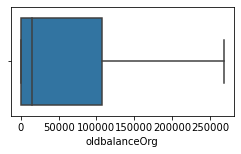

In [9]:
plt.figure(figsize=(4, 2))
sns.boxplot(df['oldbalanceOrg'])

### Treating outliers for column -  newbalanceOrig

In [10]:
lower_limit, upper_limit = outlier_treatment(df.newbalanceOrig)
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

Upper limit:  360646.025
Lower limit:  -216387.615


In [11]:
df['newbalanceOrig'] = np.where(
    df['newbalanceOrig'] > upper_limit,
    upper_limit,
    np.where(
        df['newbalanceOrig'] < lower_limit,
        lower_limit,
        df['newbalanceOrig']
    )
)

<AxesSubplot:xlabel='newbalanceOrig'>

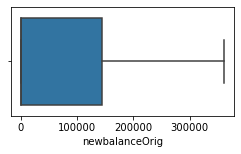

In [12]:
plt.figure(figsize=(4, 2))
sns.boxplot(df['newbalanceOrig'])

### Treating outliers for column - oldbalanceDest

In [13]:
lower_limit, upper_limit = outlier_treatment(df.oldbalanceDest)
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

Upper limit:  2357591.76875
Lower limit:  -1414555.06125


In [14]:
df['oldbalanceDest'] = np.where(
    df['oldbalanceDest'] > upper_limit,
    upper_limit,
    np.where(
        df['oldbalanceDest'] < lower_limit,
        lower_limit,
        df['oldbalanceDest']
    )
)

<AxesSubplot:xlabel='oldbalanceDest'>

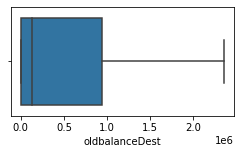

In [15]:
plt.figure(figsize=(4, 2))
sns.boxplot(df['oldbalanceDest'])

### Treating outliers for column - newbalanceDest

In [16]:
lower_limit, upper_limit = outlier_treatment(df.newbalanceDest)
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

Upper limit:  2779773.125
Lower limit:  -1667863.875


In [17]:
df['newbalanceDest'] = np.where(
    df['newbalanceDest'] > upper_limit,
    upper_limit,
    np.where(
        df['newbalanceDest'] < lower_limit,
        lower_limit,
        df['newbalanceDest']
    )
)

<AxesSubplot:xlabel='newbalanceDest'>

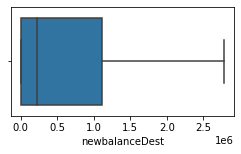

In [18]:
plt.figure(figsize=(4, 2))
sns.boxplot(df['newbalanceDest'])

## Bivariate Analysis

### Analyzing Feature:  type and isFraud

In [19]:
pd.crosstab(index=df.type, columns=df.isFraud)

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


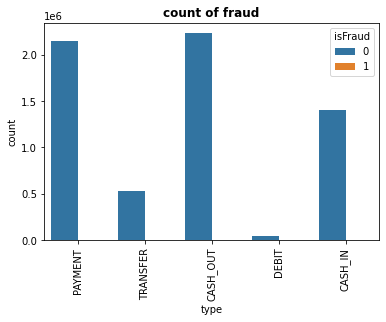

In [19]:
sns.countplot(x='type', hue='isFraud', data=df)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('count of fraud', fontsize=12, fontweight='bold')
plt.show()

* We can see that fraud occurred mostly through **Transfer** and **Cashout**.

In [20]:
Cashout = 2233384 + 4116
Cashout_fraud = 4116/(Cashout) * 100
Cashout_fraud

0.18395530726256984

* 0.184 % denotes the percentage of fraud happened in total cashout mode type, which is very less 

In [21]:
transfer= 528812+4097
transfer_fraud = 4097/(transfer) * 100
transfer_fraud

0.7687991758442811

* 0.769 % denotes the percentage of fraud happened in total tranfer mode type, which is also very less

### Analyzing Feature: amount and isFraud 

<AxesSubplot:title={'center':'amount'}, xlabel='isFraud'>

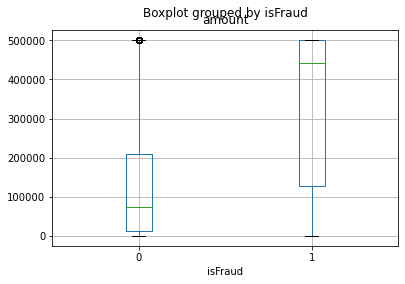

In [19]:
df.boxplot(column='amount', by='isFraud')

* Fraud amount transaction range is between 1.3 - 5 lakh

### Analyzing Feature: type & amount 

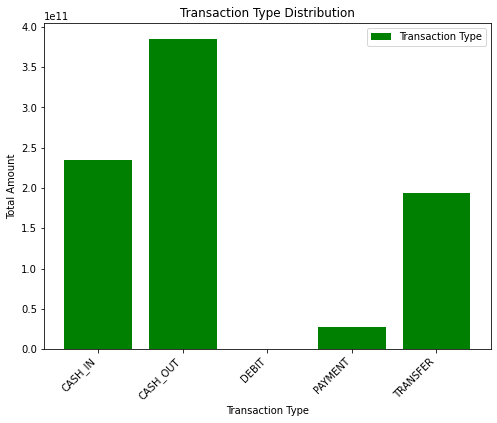

In [22]:
df1 = df.groupby('type')['amount'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(df1['type'], df1['amount'], color='green', label='Transaction Type')
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

* Highest total amount transaction occur through cash out.

## Multivariate Analysis 

In [23]:
# corelatoin between the different features
corr = df.corr(method ='pearson')
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.006680,-0.013257,-0.013295,0.000771,-0.005745,0.031578,0.003277
amount,-0.006680,1.000000,0.023468,0.050487,0.412529,0.497708,0.048094,0.003837
oldbalanceOrg,-0.013257,0.023468,1.000000,0.858632,0.105036,0.038118,0.045966,0.003036
newbalanceOrig,-0.013295,0.050487,0.858632,1.000000,0.120676,0.016830,-0.021092,0.003090
oldbalanceDest,0.000771,0.412529,0.105036,0.120676,1.000000,0.966351,-0.013570,-0.001138
newbalanceDest,-0.005745,0.497708,0.038118,0.016830,0.966351,1.000000,-0.001172,-0.001172
isFraud,0.031578,0.048094,0.045966,-0.021092,-0.013570,-0.001172,1.000000,0.044109
isFlaggedFraud,0.003277,0.003837,0.003036,0.003090,-0.001138,-0.001172,0.044109,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

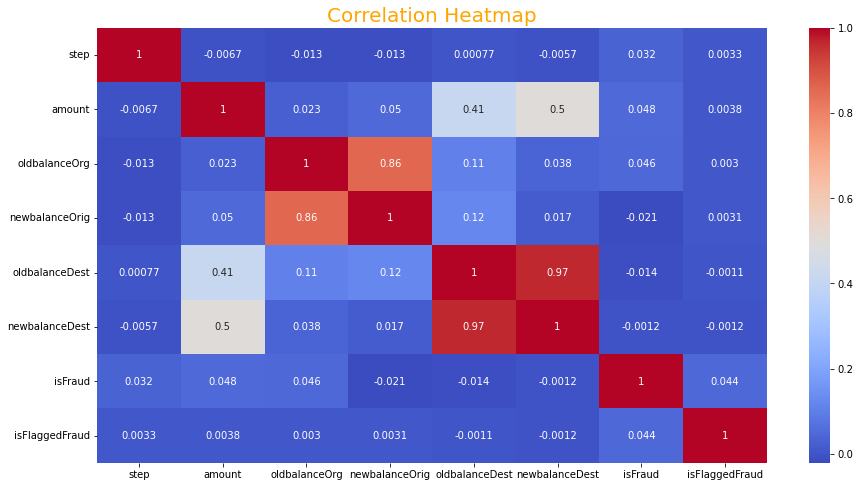

In [25]:
#Plotting heatmap
plt.subplots(figsize =(15, 8)) 
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.title(f"Correlation Heatmap" , fontsize=20,
          color="orange")

* There is a high correlation between newbalanceOrig, oldbalanceOrg and also between newbalanceDest and oldbalanceDest.


### Analyzing Feature: oldbalanceOrg, amount and isFraud

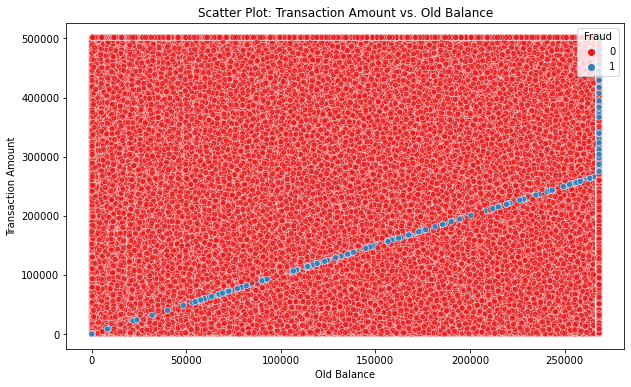

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', data=df, hue='isFraud', palette='Set1', alpha=0.7)
plt.title('Scatter Plot: Transaction Amount vs. Old Balance')
plt.xlabel('Old Balance')
plt.ylabel('Transaction Amount')
plt.legend(title='Fraud', loc='upper right')
plt.show()

### Analyzing Feature: newbalanceOrig, amount and isFraud 

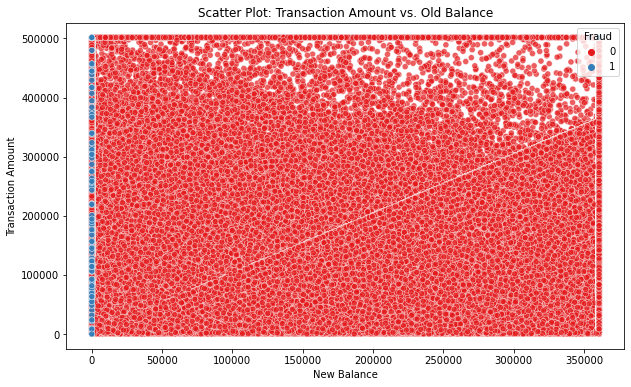

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='newbalanceOrig', y='amount', data=df, hue='isFraud', palette='Set1', alpha=0.7)
plt.title('Scatter Plot: Transaction Amount vs. Old Balance')
plt.xlabel('New Balance')
plt.ylabel('Transaction Amount')
plt.legend(title='Fraud', loc='upper right')
plt.show()

### Removing unnecessary columns 

In [19]:
df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64000,170136.0000,160296.36,0.000000e+00,0.000,0
1,1,PAYMENT,1864.28000,21249.0000,19384.72,0.000000e+00,0.000,0
2,1,TRANSFER,181.00000,181.0000,0.00,0.000000e+00,0.000,1
3,1,CASH_OUT,181.00000,181.0000,0.00,2.118200e+04,0.000,1
4,1,PAYMENT,11668.14000,41554.0000,29885.86,0.000000e+00,0.000,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13000,268287.9375,0.00,0.000000e+00,339682.130,1
6362616,743,TRANSFER,501719.33875,268287.9375,0.00,0.000000e+00,0.000,1
6362617,743,CASH_OUT,501719.33875,268287.9375,0.00,6.848884e+04,2779773.125,1
6362618,743,TRANSFER,501719.33875,268287.9375,0.00,0.000000e+00,0.000,1


# Conclusion from EDA

* We have large number of records which are incorrectly flagged as 0. Incorrect flagging might have big impact in future if we don't calculate it properly as it might lead to increase in online payment fraud percentage as people rely more on online payment nowadays
* The amount range usually fraudsters target is around 1.3-5 lakhs which is certainly a large amount
* Fraudsters focus cashout and payment mode type transfer
* Total there is 8213 fraud transactions happened which constitutes around 0.13% of total transactions happened
* 0.183 % fraud happened in total cashout mode type and 0.769 % fraud happened in total transfer mode type
* There is a high correlation between newbalanceOrig, oldbalanceOrg and also between newbalanceDest and oldbalanceDest

# Recommendations

* Implement stricter monitoring and additional verification steps for transactions in the range of 1.3-5 lakhs, as this range is frequently targeted by fraudsters.
* Use risk-based authentication methods where higher-risk transactions require additional verification steps, such as multi-factor authentication or biometric verification.
* Cashout and Transfer Modes have higher fraud percentages, implement stricter checks and controls specifically for these types of transactions.
* Set lower transaction limits for cashout and transfer modes unless the user completes additional verification steps.
* Conduct regular awareness campaigns to educate customers about common fraud tactics and how to recognize and report suspicious activities.
* Implement real-time transaction alerts via SMS or email to inform customers immediately of any transactions, allowing them to quickly report unauthorized activities.